In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#--------------- keras imports -------------------#
import keras
from keras.layers import Input, Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using Theano backend.


In [2]:
mean_01 = np.array([3.0, 3.0])
cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])

mean_02 = np.array([-3.0, 1.0])
cov_02 = np.array([[0.5, 0.4], [0.4, 0.7]])

mean_03 = np.array([1.0, -1.0])
cov_03 = np.array([[0.5, 0.4], [0.4, 0.7]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 250)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 250)
dist_03 = np.random.multivariate_normal(mean_03, cov_03, 250)

total_data_size = dist_01.shape[0] + dist_02.shape[0] + dist_03.shape[0]
data_dim = dist_01.shape[1]

labels = np.zeros((total_data_size,))
labels[dist_01.shape[0]:dist_01.shape[0]+dist_02.shape[0]] = 1
labels[dist_01.shape[0]+dist_02.shape[0]:] = 2

data = np.zeros((total_data_size, data_dim + 1))

data[:dist_01.shape[0], :data_dim] = dist_01
data[dist_01.shape[0]:dist_01.shape[0] + dist_02.shape[0], :data_dim] = dist_02
data[dist_01.shape[0] + dist_02.shape[0]:, :data_dim] = dist_03

data[:, -1] = labels

np.random.shuffle(data)

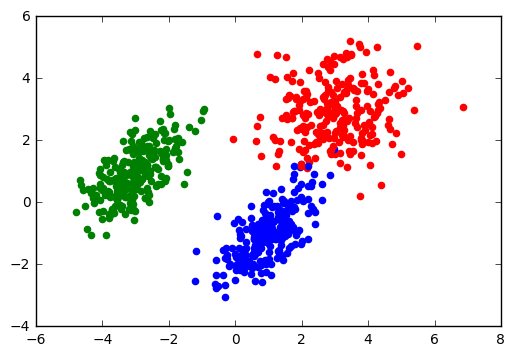

In [3]:
plt.figure(0)

for ix in range(data.shape[0]):
    if data[ix, -1] == 0:
        plt.scatter(data[ix, 0], data[ix, 1], color='red')
    elif data[ix, -1] == 1:
        plt.scatter(data[ix, 0], data[ix, 1], color='green')
    else:
        plt.scatter(data[ix, 0], data[ix, 1], color='blue')
plt.show()

In [4]:
split = int(total_data_size * 0.8)
X_train = data[:split, :-1]
X_val = data[split:, :-1]

y_train = np_utils.to_categorical(data[:split, -1])
y_val = np_utils.to_categorical(data[split:, -1])
print y_train
print X_train.shape, X_val.shape
print y_train.shape, y_val.shape

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 ..., 
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
(600, 2) (150, 2)
(600, 3) (150, 3)


In [14]:
#--------------- keras model -----------------#

model = Sequential()

fc1 = Dense(4, input_shape=(2,))
model.add(fc1)
model.add(Activation('sigmoid'))

fc2 = Dense(3)
model.add(fc2)
model.add(Activation('softmax'))

model.summary()
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_7 (Dense)                  (None, 4)             12          dense_input_4[0][0]              
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 4)             0           dense_7[0][0]                    
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 3)             15          activation_7[0][0]               
____________________________________________________________________________________________________
activation_8 (Activation)        (None, 3)             0           dense_8[0][0]                    
Total params: 27
Trainable params: 27
Non-trainable params: 0
_____________________________

In [15]:
hist = model.fit(X_train, y_train,
          nb_epoch=250,
          shuffle=True,
          validation_data=(X_val, y_val))

Train on 600 samples, validate on 150 samples
Epoch 1/250
600/600 [==============================] - 0s - loss: 0.8513 - acc: 0.5517 - val_loss: 0.8424 - val_acc: 0.5578
Epoch 2/250
600/600 [==============================] - 0s - loss: 0.8345 - acc: 0.5544 - val_loss: 0.8264 - val_acc: 0.5489
Epoch 3/250
600/600 [==============================] - 0s - loss: 0.8190 - acc: 0.5544 - val_loss: 0.8119 - val_acc: 0.5489
Epoch 4/250
600/600 [==============================] - 0s - loss: 0.8049 - acc: 0.5556 - val_loss: 0.7984 - val_acc: 0.5489
Epoch 5/250
600/600 [==============================] - 0s - loss: 0.7917 - acc: 0.5567 - val_loss: 0.7858 - val_acc: 0.5511
Epoch 6/250
600/600 [==============================] - 0s - loss: 0.7794 - acc: 0.5578 - val_loss: 

In [19]:
print hist.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']


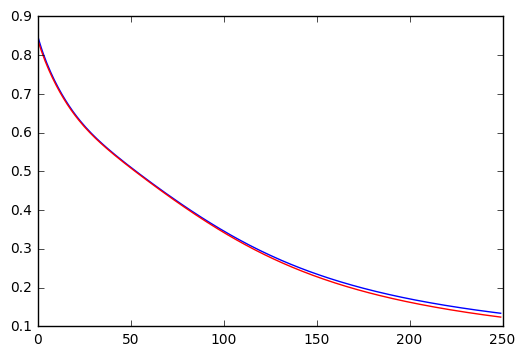

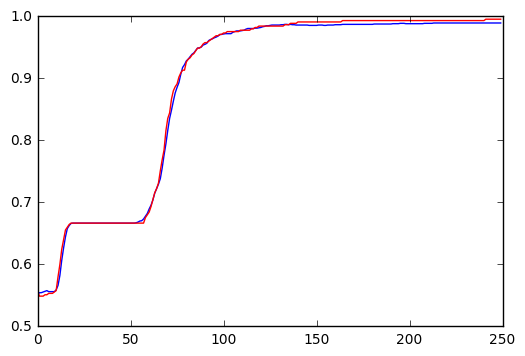

In [16]:
plt.figure(0)
plt.plot(hist.history['loss'], 'b')
plt.plot(hist.history['val_loss'], 'r')

plt.figure(1)
plt.plot(hist.history['acc'], 'b')
plt.plot(hist.history['val_acc'], 'r')
plt.show()
# print hist.history.keys()